In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt
import math, config

from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Read Daily Data and select Asset 2 
path = config.path_ARIMA

df01 = pd.read_csv(f'{path}/All_2017_01_01_to_2023_05_31_daily.csv')
df = df01.loc[df01.id_asset == 2]
df.index = df['timestamp']
df.head()

,id_asset,timestamp,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore
timestamp,,,,,,,,,,,,,
2017-07-14,2,2017-07-14,0.080000,0.091033,0.080000,0.090993,1942.057,2017-07-14 23:59:59.999,170.238524,1994,1076.405,94.825272,0.0
2017-07-15,2,2017-07-15,0.090993,0.093699,0.087127,0.087635,4013.066,2017-07-15 23:59:59.999,363.031788,4623,2250.318,203.541498,0.0
2017-07-16,2,2017-07-16,0.087508,0.087635,0.075591,0.082241,8904.158,2017-07-16 23:59:59.999,722.212482,8137,5557.575,450.343887,0.0
2017-07-17,2,2017-07-17,0.082368,0.088394,0.081699,0.087537,6650.933,2017-07-17 23:59:59.999,568.246538,7639,3859.485,329.668753,0.0
2017-07-18,2,2017-07-18,0.087831,0.109068,0.084777,0.107732,7245.741,2017-07-18 23:59:59.999,674.497850,8121,4202.055,393.111403,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2148 entries, 2017-07-14 to 2023-05-31
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id_asset                      2148 non-null   int64  
 1   timestamp                     2148 non-null   object 
 2   open                          2148 non-null   float64
 3   high                          2148 non-null   float64
 4   low                           2148 non-null   float64
 5   close                         2148 non-null   float64
 6   volume                        2148 non-null   float64
 7   close_time                    2148 non-null   object 
 8   quote_asset_volume            2148 non-null   float64
 9   number_of_trades              2148 non-null   int64  
 10  taker_buy_base_asset_volume   2148 non-null   float64
 11  taker_buy_quote_asset_volume  2148 non-null   float64
 12  ignore                        2148 non-null   float6

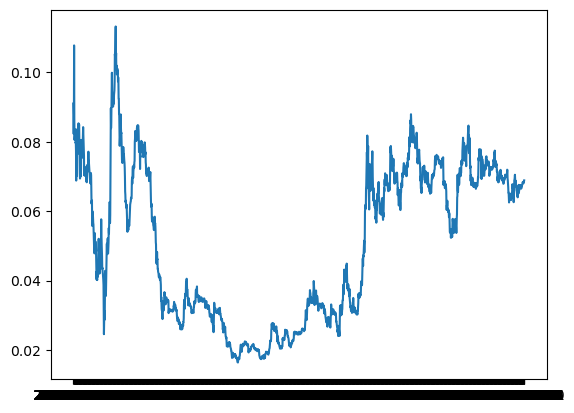

In [4]:
# Plot Close Price
plt.plot(df.index, df['close'])
plt.show()

In [5]:
# Train test split
to_row = int(len(df)*0.9) #==> get 90% data for train , 10% data for test

train_df = df[0:to_row]['close']
test_df = df[to_row:]['close']

train_data = list(train_df)
test_data = list(test_df)
print("Train data = ", len(train_data), "Test Data = ",len(test_data))
print(train_data[:5])
print(test_data[:5])

Train data =  1933 Test Data =  215
[0.090993, 0.087635, 0.082241, 0.087537, 0.107732]
[0.077834, 0.077114, 0.076744, 0.077075, 0.075357]


<Figure size 1000x600 with 0 Axes>

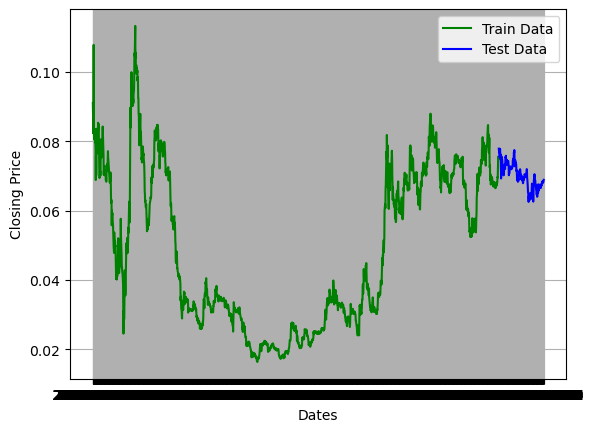

In [6]:
# Plot splited data into a train and training set

plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Price')
plt.plot(train_df, 'green', label= 'Train Data')
plt.plot(test_df, 'blue', label= 'Test Data')
plt.legend()
plt.show()

In [63]:
# Model Predictin with ARIMA
model_predictions = []
n_test_obser = len(test_data)
n = 0

for i in range(n_test_obser):
    model = ARIMA(train_data, order = (4,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    actual_test_value = test_data[i]
    train_data.append(actual_test_value)
    n+=1
    
    print(f'{n} ,yhat = {yhat} , actual value = {actual_test_value}')
    #break

1 ,yhat = 0.07058497408319356 , actual value = 0.077834
2 ,yhat = 0.07772028943327924 , actual value = 0.077114
3 ,yhat = 0.07712672674246285 , actual value = 0.076744
4 ,yhat = 0.07694999333757296 , actual value = 0.077075
5 ,yhat = 0.07699043640340489 , actual value = 0.075357
6 ,yhat = 0.07539146143297401 , actual value = 0.075772
7 ,yhat = 0.07577530100877741 , actual value = 0.077787
8 ,yhat = 0.07769156682209344 , actual value = 0.076379
9 ,yhat = 0.0764384225639019 , actual value = 0.07502
10 ,yhat = 0.07510371462051921 , actual value = 0.076153
11 ,yhat = 0.07606996093853743 , actual value = 0.071965
12 ,yhat = 0.07203585638612824 , actual value = 0.069253
13 ,yhat = 0.069360689193761 , actual value = 0.073828
14 ,yhat = 0.07359194851918491 , actual value = 0.075563
15 ,yhat = 0.0754718400548438 , actual value = 0.07479
16 ,yhat = 0.07496241717988116 , actual value = 0.074803
17 ,yhat = 0.07481025894522353 , actual value = 0.074792
18 ,yhat = 0.07475141279771927 , actual value 

145 ,yhat = 0.0640180350296737 , actual value = 0.063642
146 ,yhat = 0.06362735818877116 , actual value = 0.064106
147 ,yhat = 0.06415789840788856 , actual value = 0.063701
148 ,yhat = 0.06367767327622341 , actual value = 0.063422
149 ,yhat = 0.06344854948560763 , actual value = 0.063425
150 ,yhat = 0.0634091928479414 , actual value = 0.06323
151 ,yhat = 0.06323016861318155 , actual value = 0.06503
152 ,yhat = 0.0649941683392648 , actual value = 0.063247
153 ,yhat = 0.06327358213354532 , actual value = 0.063984
154 ,yhat = 0.0640302817886351 , actual value = 0.063987
155 ,yhat = 0.06391194711183568 , actual value = 0.063992
156 ,yhat = 0.06403244428097231 , actual value = 0.063692
157 ,yhat = 0.06369124838990198 , actual value = 0.065124
158 ,yhat = 0.06509271925834663 , actual value = 0.066414
159 ,yhat = 0.06637006304327848 , actual value = 0.067754
160 ,yhat = 0.06776480562591099 , actual value = 0.066789
161 ,yhat = 0.06682871702078041 , actual value = 0.066784
162 ,yhat = 0.066814

In [64]:
# Print Model Summary
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2207
Model:                 ARIMA(4, 1, 0)   Log Likelihood               10838.731
Date:                Thu, 01 Jun 2023   AIC                         -21667.462
Time:                        11:46:16   BIC                         -21638.968
Sample:                             0   HQIC                        -21657.052
                               - 2207                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0225      0.007     -3.219      0.001      -0.036      -0.009
ar.L2         -0.0036      0.011     -0.344      0.731      -0.024       0.017
ar.L3          0.0293      0.013      2.198      0.0

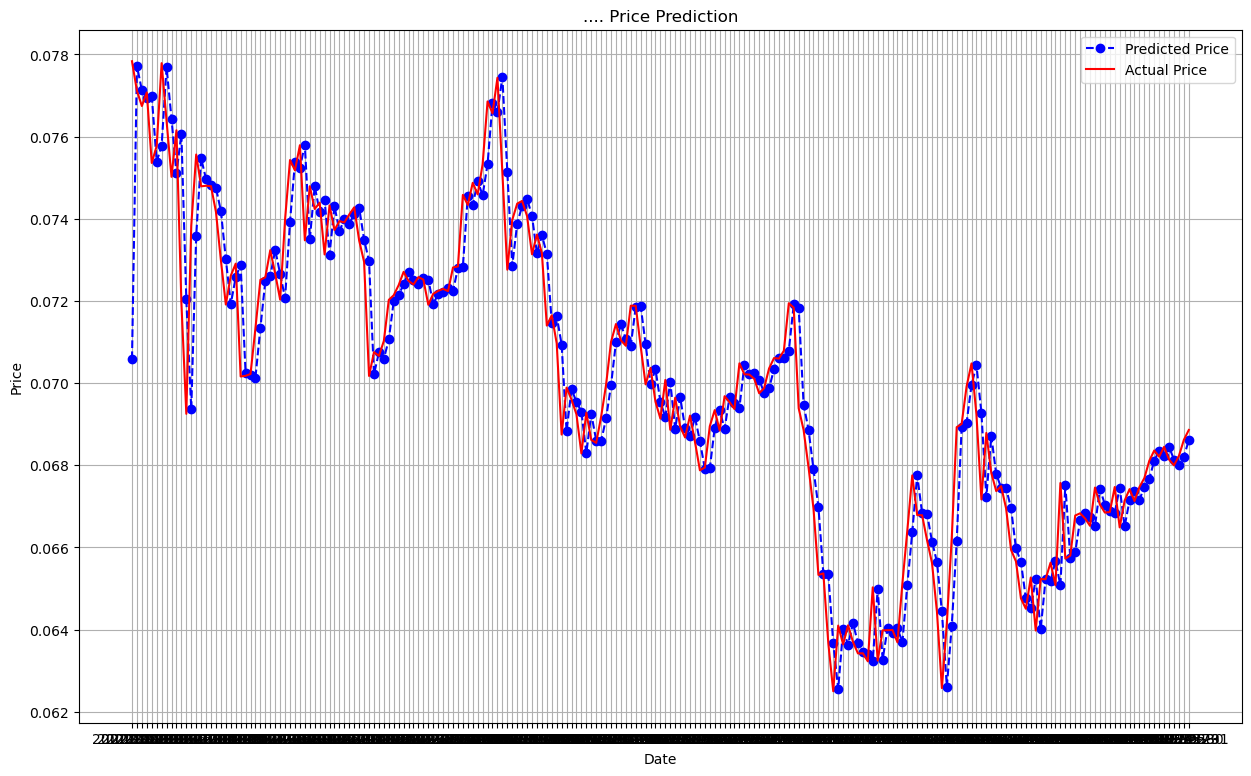

In [73]:
# Plot 03 - Predicted and Actual Price

plt.figure(figsize=(15,9))
plt.grid(True)

data_range = df[to_row:].index

plt.plot(data_range, model_predictions, 'blue', marker ='o', linestyle = 'dashed', label = 'Predicted Price')
plt.plot(data_range, test_data, 'red', label = 'Actual Price' )

plt.title('.... Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [74]:
print(len(data_range),len(model_predictions))

215 215


In [87]:
# report performance 
model_pred = np.abs(np.array(model_predictions) - np.array(test_data))
test_pred = np.abs(test_data)

mape = np.mean(model_pred / test_pred ) # Mean absolute percentage error


print(f'MAPE : {mape}') 
# Around 1.1% MAPE ==> The model is 98.9% accurate in predicting the test set observation.

MAPE : 0.011187256195637272


In [ ]:
# Recap 

# Read Daily Data and select Asset 2 
path = config.path_ARIMA

df01 = pd.read_csv(f'{path}/All_2017_01_01_to_2023_05_31_daily.csv')
df = df01.loc[df01.id_asset == 2]
df.index = df['timestamp']
print(df.head(1))

# Plot 01- Close Price
plt.plot(df.index, df['close'])
plt.show()


# Train test split
to_row = int(len(df)*0.9) #==> get 90% data for train , 10% data for test

train_df = df[0:to_row]['close']
test_df = df[to_row:]['close']

train_data = list(train_df)
test_data = list(test_df)
print(len(train_data), len(test_data))
train_data[:5]


# Plot 02 - splited data into a train and training set
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Price')
plt.plot(train_df, 'green', label= 'Train Data')
plt.plot(test_df, 'blue', label= 'Test Data')
plt.legend()
plt.show()

# Model Predictin with ARIMA (Take to much time !!!)
model_predictions = []
n_test_obser = len(test_data)
n = 0

for i in range(n_test_obser):
    model = ARIMA(train_data, order = (4,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    actual_test_value = test_data[i]
    train_data.append(actual_test_value)
    n+=1
    
    print(f'{n} ,yhat = {yhat} , actual value = {actual_test_value}')
    #break
    
# Print Model Summary
print(model_fit.summary())

# Plot 03 - Predicted and Actual Price
plt.figure(figsize=(15,9))
plt.grid(True)

data_range = df[to_row:].index

plt.plot(data_range, model_predictions, 'blue', marker ='o', linestyle = 'dashed', label = 'Predicted Price')
plt.plot(data_range, test_data, 'red', label = 'Actual Price' )

plt.title('.... Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# report performance 
model_pred = np.abs(np.array(model_predictions) - np.array(test_data))
test_pred = np.abs(test_data)

mape = np.mean(model_pred / test_pred ) # Mean absolute percentage error

print(f'MAPE : {mape}') 
# Around 1.1% MAPE ==> The model is 98.9% accurate in predicting the test set observation.